#Probability Distributions#

It is important to be able to generate random variables and compute pdf, cdf, etc for a given distributions. Below I will provide some syntax for the most popular distributions. I will use scipy.stat for this purpose.

**Normal Distribution**

In [2]:
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
rv = norm.rvs(loc=4, scale=2, size=1000)

(array([   8.,   48.,  147.,  262.,  309.,  176.,   46.,    4.]),
 array([ -2.49425972,  -0.90278528,   0.68868916,   2.2801636 ,
          3.87163803,   5.46311247,   7.05458691,   8.64606135,  10.23753579]),
 <a list of 8 Patch objects>)

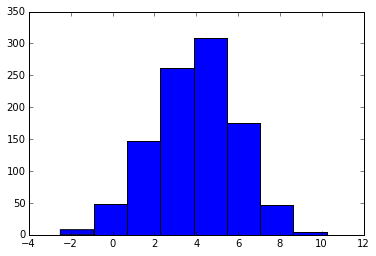

In [14]:
plt.hist(rv, bins = 8 )

In [16]:
norm(loc=4, scale=2).pdf(4) # p(x=4) when x is Gaussion with mean 4 and std dev 2 (PDF)

0.19947114020071635

In [17]:
norm(loc=4, scale=2).cdf(4) # p(x<=4) when x is Gaussion with mean 4 and std dev 2 (CDF)

0.5

In [18]:
rv.mean()

3.9675610592358295

In [19]:
rv.std()

1.9730659172376444

**Binomial Distribution **

In [20]:
from scipy.stats import binom

In [21]:
n, p = 8, .4
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

In [30]:
rv = binom.rvs(n=8, p=.4, size=1000)

(array([  21.,   94.,  181.,  307.,  232.,  115.,   45.,    5.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

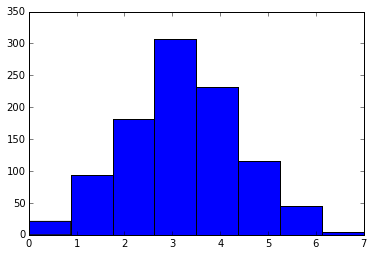

In [32]:
plt.hist(rv, bins = 8 )

In [33]:
binom(n=8, p=.4).pmf(3)

0.27869184000000019

In [35]:
binom(n=8, p=.4).cdf(3)

0.59408640000000024

** Uniform Distribution **

In [36]:
from scipy.stats import uniform

In [40]:
rv = uniform.rvs(loc=0, scale=10, size = 1000)

(array([  98.,   95.,   93.,  111.,   96.,  100.,  103.,   97.,  109.,   98.]),
 array([  1.73130950e-03,   1.00098686e+00,   2.00024241e+00,
          2.99949797e+00,   3.99875352e+00,   4.99800907e+00,
          5.99726463e+00,   6.99652018e+00,   7.99577573e+00,
          8.99503128e+00,   9.99428684e+00]),
 <a list of 10 Patch objects>)

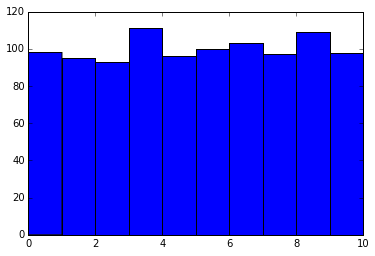

In [42]:
plt.hist(rv)

In [43]:
rv.mean()

5.0408219202489359

In [44]:
rv.std()

2.8826723962595953

## Exercise ##

Generate a sample X of size 100 from N(μ =5,$\sigma^2$ = 4). Compute sample mean and sample standard deviation of this sample. Plot on the same graph an empirical c.d.f. of your data and a normal c.d.f. with estimated mean and standard deviation. 

In [70]:
rv = norm.rvs(loc = 5, scale = 2, size = 100)

In [71]:
mean_est, std_est = rv.mean(), rv.std()
print 'Estimated mean is: ', mean_est
print 'Estimated std is: ', std_est

Estimated mean is:  4.66635700892
Estimated std is:  2.12044897684


In [75]:
import numpy as np
x = np.linspace(rv.min(),rv.max(),len(rv))
cdf_analytic = norm(loc=mean_est, scale = std_est).cdf(x)
num_bins = len(x)
counts, bin_edges = np.histogram(rv, bins=num_bins)
cdf_emprical = np.cumsum(counts)/sum(counts)
#cdf_func = lambda rv: [sum(np.sort(rv) < val)/len(rv) for val in np.sort(rv) ]
#cdf_emprical = cdf_func(rv)

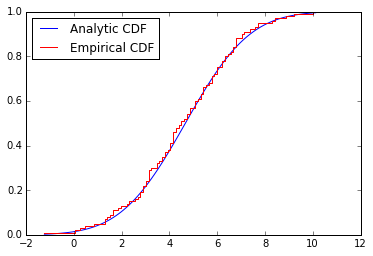

In [76]:
plt.plot(x, cdf_analytic, label='Analytic CDF')
plt.step(x, cdf_emprical, label='Empirical CDF',color='r')
plt.legend(loc='best')